Project Title:
Grapes to Greatness: Machine Learning in Wine Quality Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.Load the Dataset

In [ ]:
df= pd.read_csv(r"C:/Users/sonudr/Downloads/winequality-red.csv")

2.Data preprocessing including visualization

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:


# Summary statistics
print(df.describe())



       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [ ]:
# Data types of columns
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
# Check for missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
#data cleaning
# Remove duplicate rows if any
df = df.drop_duplicates()

# Fill missing values or drop rows/columns with missing values
df = df.dropna()  # Drop rows with missing values



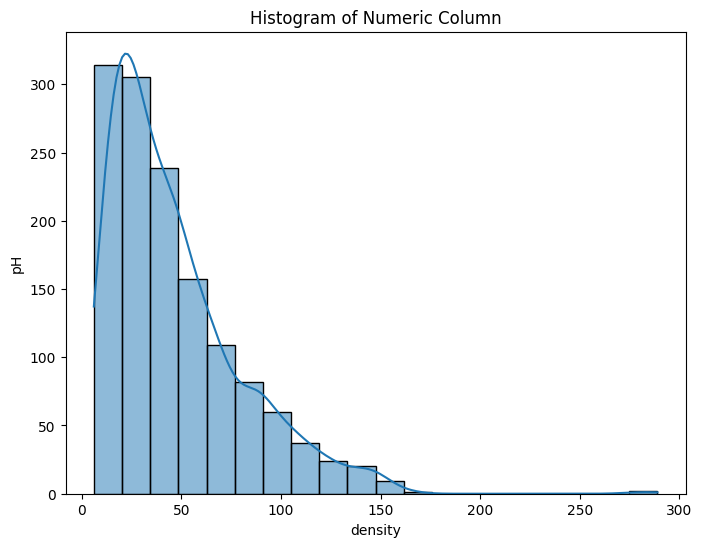

In [ ]:
# Data Visualization Histogram for a numerical column
plt.figure(figsize=(8, 6))
sns.histplot(df['total sulfur dioxide'], bins=20, kde=True)
plt.title('Histogram of Numeric Column')
plt.xlabel('density')
plt.ylabel('pH')
plt.show()



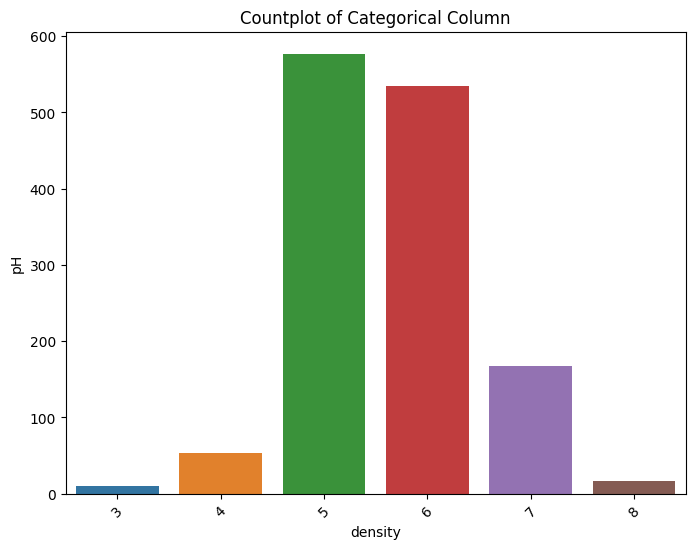

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='quality')
plt.title('Countplot of Categorical Column')
plt.xlabel('density')
plt.ylabel('pH')
plt.xticks(rotation=45)
plt.show()

Machine Learning Model building

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor  # Replace with the appropriate algorithm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('chlorides', axis=1)
y = df['chlorides']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Evaluate the model

In [ ]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.016559080882352945
Mean Squared Error (MSE): 0.0007294537672794115
Root Mean Squared Error (RMSE): 0.027008401790543094


Test with random observation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    # Add other hyperparameters
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [ ]:
import pandas as pd
import numpy as np

# Create random observation
random_observation = pd.DataFrame({
    'density': [np.random.rand()],
    'fixed acidity': [np.random.rand()],
    'free sulfur dioxide	': [np.random.rand()],
    # Add other feature columns as needed
})